# Estudio e Investigación para el Desarrollo de un Wrapper de Twitter Streaming

por Álvaro Bartolomé del Canto (alvarob96@usal.es)

---

## Introducción a Twitter API Streaming

La *API* de *Twitter* ofrece un sistema de ingesta de datos en *Streaming* que en base a una *track query* recupera datos de *Twitter*. Dado que **Twitter Streaming** funciona con un sistema de autenticación **OAuth1**, el cual requiere las claves: *CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN y ACCESS_TOKEN_SECRET*, en base a las cuales construirá un objeto de autenticación OAUth1 que irá en la cabecera de cada una de las peticiones al *endpoint* para el *Streaming*.

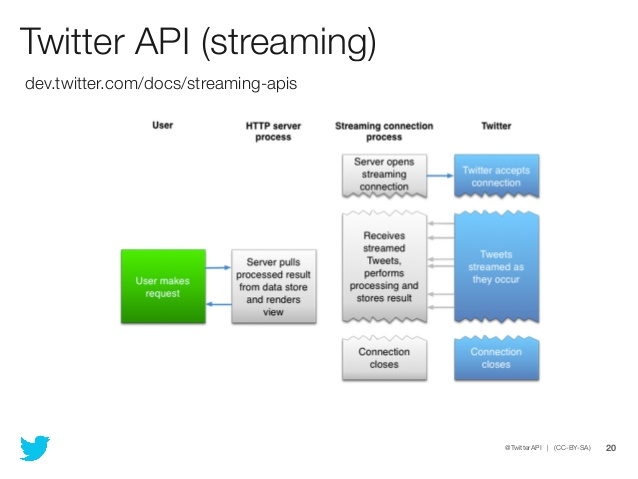

In [11]:
from IPython.display import Image
Image(filename='resources/twitter_streaming.png') 

## Método de Autenticación Twitter API Streaming (OAuth1)

Se utilizará el paquete de Python [requests_oauthlib](https://pypi.org/project/requests-oauthlib/) con el fin de obtener el objeto de OAuth1 que irá en los *headers* de la petición *POST* a la *Streaming API de Twitter*, de modo que podamos identificar la aplicación de *Twitter*, ya que se requiere la identificación para tener acceso a los datos. En caso de no enviar el objeto OAuth1 en los *headers* de las peticiones, la *API de Twitter* retornará el código de error pertinente, según los definidos en la sección "HTTP Error Codes" de: https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/connecting.html, en caso de no autenticarnos, el código de error es 406.

In [4]:
from requests_oauthlib import OAuth1

auth = OAuth1('07ypDMOmSBXdUuqBao5KrgdHq', 'J0Psc2WO5oR5R3b4d6ek6QRqNXatxHwjQHLpyEaaND6QvlenFu',
              '254490342-pVXGLlxcVQRWEXurhSvzsHsfId8ZV4KLYBpMr5Ll', 'enVrorE6T5w8UAxUP7m5jC8wHUhzptHlzVMZhaPWDVSP0')

## Petición POST al Streaming y Parseo del JSON Resultante

Una vez disponemos del objeto *OAuth1* para la autenticación de la aplicación de *Twitter* en la *API*, procedemos a realizar una petición a través del paquete [requests](https://pypi.org/project/requests/) de tipo *POST* enviando el objeto *OAuth1* en el campo "auth" de la petición, junto con el "endpoint" de la *API*, los "headers" y los "params".

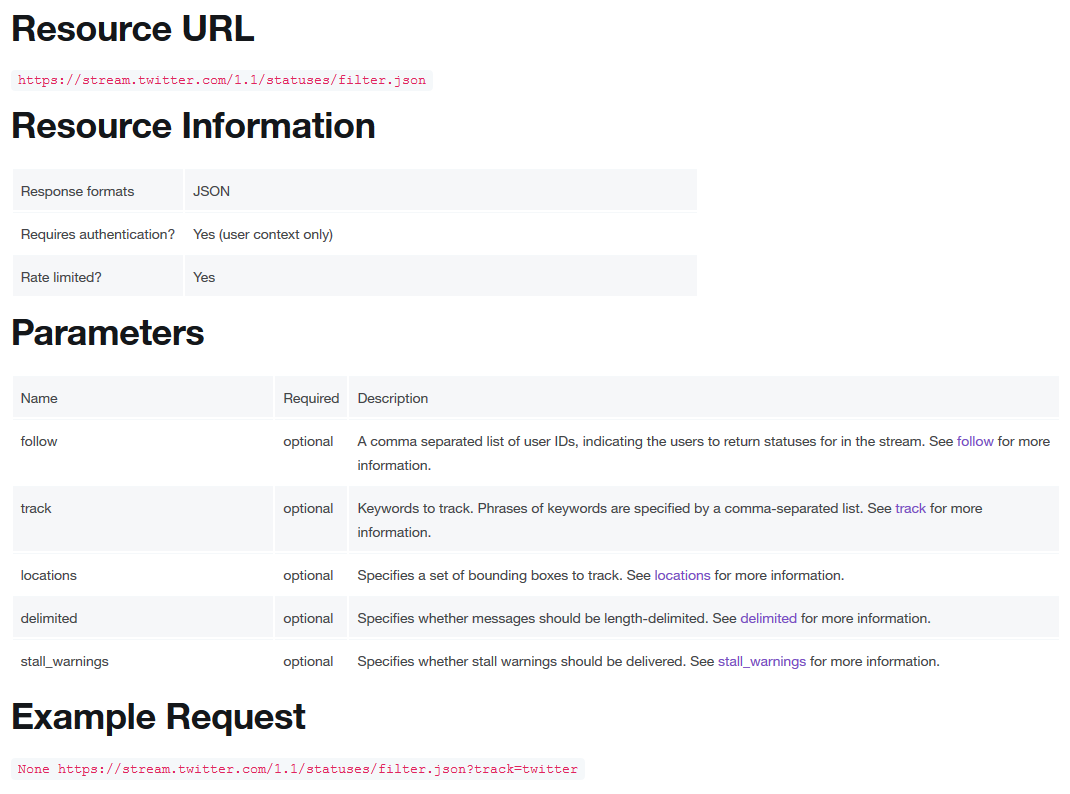

In [13]:
from IPython.display import Image
Image(filename='resources/post_streaming.png') 

In [7]:
url = 'https://stream.twitter.com/1.1/statuses/filter.json'

headers ={
    'Content-Type': 'application/json',
}

params = {
    'track': 'psoe',
    'language': 'es'
}

response = requests.post(url, auth=auth, headers=headers, params=params, stream=True)

tweets = list()
tweet_counter = 0
tweet_limit = 20

for line in response.iter_lines():
    tweet = json.loads(line.decode('utf-8'))
    
    if 'retweeted_status' in tweet:
        if 'extended_tweet' in tweet['retweeted_status']:
            tweets.append(tweet['retweeted_status']['extended_tweet']['full_text'])
        else:
            tweets.append(tweet['retweeted_status']['text'])
    elif 'extended_tweet' in tweet:
        tweets.append(tweet['extended_tweet']['full_text'])
    else:
        tweets.append(tweet['text'])
        
    tweet_counter += 1
    
    if tweet_counter == tweet_limit:
        break

## Parámetros de Búsqueda Estándar

Además, podemos personalizar la búsqueda ("track query") a nuestro gusto, con los "Standard Operators", proporcionados de forma gratuita para la versión gratuita en *Streaming* de la *API de Twitter*.

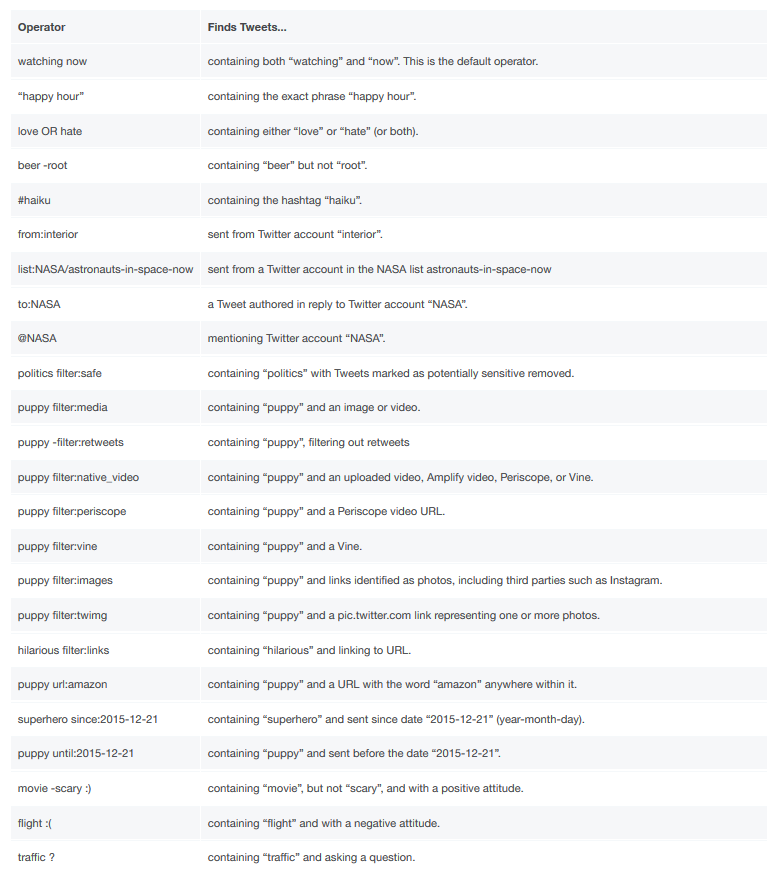

In [12]:
from IPython.display import Image
Image(filename='resources/standard_operators.png') 

De este modo, una vez finalizado el *Stream* la información recuperada del mismo se almacenará bien en un fichero de texto, base de datos (*noSQL*) o en una lista. En este caso, dado que conforma una prueba de concepto de la *API* de *Twitter* en *Streaming*, se retorna una lista que contiene el texto plano de todos y cada uno de los *tweets* recuperados.

## Resultado/Salida del Streaming de 20 Tweets

In [8]:
tweets

['ELECCIONES YA! PARA FILTRAR AL #JULANDRA \nNO HAY NAD QUE PACTAR CON ESTE #FARSANTE\n#InvestiduraRTVE25J \n#InvestiDudaARV \n@sanchezcastejon \n@PSOE \n@Adrilastra \n@abalosmeco \n@carmencalvo_ https://t.co/fZ67bCd1hB',
 'En septiembre tendremos gobierno de coalición. Basta que el @PSOE presente a Unidas Podemos la misma oferta de hoy pero, ahora sí, con contenidos concretos. También deben los dos sentarse a hablar de empleo. Era casi imposible lograrlo en dos días. Ahora hay dos meses. A hablar.',
 'El documento de las peticiones de Unidas Podemos y el de las propuestas del PSOE salieron de Vicepresidencia del Gobierno según los metadatos https://t.co/zazM1Ym1Y7 vía @eldiarioes',
 '@gerardotc @PSOE El clan del más periodismo neutral no va a defraudar al PSOE. ya tienen hasta al errejonismo haciendo los coros del trilerismo del PSOE',
 'Parece que ese pedazo de partido de izquierdas empieza a actuar igual que lo hacia otro partido en sus “mejores tiempos” para intentar boicotear toda

## Referencias

* [Twitter API Consuming Streaming Data](https://developer.twitter.com/en/docs/tutorials/consuming-streaming-data.html)
* [Twitter API Filter Real-Time Tweets](https://developer.twitter.com/en/docs/tweets/filter-realtime/api-reference/post-statuses-filter)
* [Twitter API Rules and Filtering](https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/standard-operators.html)
* [Twitter API Authentication](https://developer.twitter.com/en/docs/basics/authentication/overview/oauth.html)

## Autor

Álvaro Bartolomé del Canto (alvarob96@usal.es)    
[LinkedIn](https://www.linkedin.com/in/alvarob96/)  
[GitHub](https://github.com/alvarob96)  